In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import linregress
from scipy.optimize import curve_fit
import sympy

In [3]:
# angle = np.array(range(0, 120+1, 10))                                           # угол рассеянья
# N = np.array([968, 843, 852, 742, 664, 583, 518, 459, 414, 366, 332, 303, 288]) # номер канала

In [4]:
# Полцчаем файловый дескриптор файла с данными
fd = pd.read_excel("../data/data.ods")

angle   = np.array(fd['theta'])                    # угол поворота
N       = np.array(fd['N'])                        # номер канала
sigma_x = np.array(fd['sigma 1-cos'])              # абсолютная погрешность величины 1 - cos 
sigma_y = np.array(fd['sigma 1/N 10^-5']) / 100000 # абсолютная погрешность величины 1/M


In [10]:
# x = np.ones(np.shape(angle)[0]) - np.cos(angle*3.14/180)
x = np.ones(np.shape(angle)[0]) - np.cos(angle)
y = 1 / N

lin = linregress(x, y)

print('Slope: %lf +- %lf' %(lin.slope, lin.stderr))
print('N(0): %lf +- %lf' %(lin.intercept, lin.intercept_stderr))
print('N(90) %lf' %(lin.intercept + lin.slope))
print('-'*50)
print('Относительная погрешность N(0) = %lf' %(lin.intercept_stderr/lin.intercept))
print('Относительная погрешность N(90) = %lf' %((lin.intercept_stderr+lin.stderr)/(lin.intercept + lin.slope)))
print('='*50)
print('Best approx to the chanales')
print('N(0) = %f' %(1 / lin.intercept))
print('N(90) = %f' %(1 / (lin.intercept + lin.slope)))

Slope: 0.001607 +- 0.000021
N(0): 0.001113 +- 0.000017
N(90) 0.002720
--------------------------------------------------
Относительная погрешность N(0) = 0.014918
Относительная погрешность N(90) = 0.013889
Best approx to the chanales
N(0) = 898.414554
N(90) = 367.673911


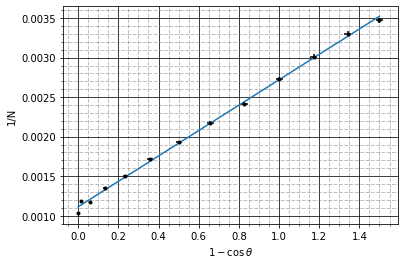

In [6]:
# plt.scatter(x, y)
plt.errorbar(x, y, xerr=sigma_x, yerr=sigma_y, fmt='.', ecolor='black', color='black')
plt.plot(x, lin.intercept + lin.slope * x)
plt.minorticks_on()
plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.xlabel(r'$1 - \cos \theta$')
plt.ylabel(r'1/N')
# plt.text(0.0, 0.003, r'Slope: $k = (%0.2lf \pm %0.2lf) \cdot 10^{-5}$' %(lin.slope*100000, lin.stderr*100000),
#            size = 8,
#            bbox=dict(facecolor='white', edgecolor='black', pad=10.0))

plt.savefig('../images/graph.pdf')